In [201]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [1]:
import pandas as pd

file_path = 'C:/Users/Lenovo/Desktop/DS/DATA.xlsx'  # Remplacer par le chemin vers votre fichier Excel
df = pd.read_excel(file_path)
df.head()


,Observation,Nom,Taille,Performance
0,1,Jacobs (EU),1.73,2.32
1,2,Noji (EU),1.73,2.31
2,3,Conway (EU),1.83,2.40
3,4,Matei (Roumanie),1.84,2.40
4,5,Austin (EU),1.84,2.40


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Observation  20 non-null     int64  
 1   Nom          20 non-null     object 
 2   Taille       20 non-null     float64
 3   Performance  20 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 772.0+ bytes
None


In [5]:
print(df.describe(include='all'))

        Observation          Nom     Taille  Performance
count      20.00000           20  20.000000    20.000000
unique          NaN           20        NaN          NaN
top             NaN  Jacobs (EU)        NaN          NaN
freq            NaN            1        NaN          NaN
mean       10.50000          NaN   1.868000     2.371500
std         5.91608          NaN   0.075853     0.039239
min         1.00000          NaN   1.730000     2.290000
25%         5.75000          NaN   1.840000     2.357500
50%        10.50000          NaN   1.850000     2.370000
75%        15.25000          NaN   1.917500     2.400000
max        20.00000          NaN   2.010000     2.450000


In [7]:
df.columns = df.columns.str.strip()

In [9]:
print(df.columns)

Index(['Observation', 'Nom', 'Taille', 'Performance'], dtype='object')


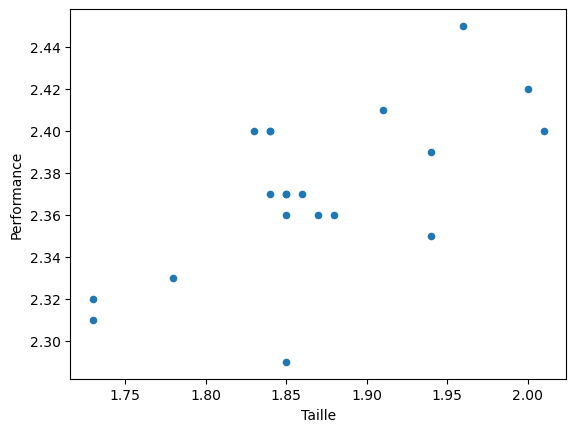

In [11]:
import matplotlib.pyplot as plt

df.plot(x ='Taille', y='Performance', kind='scatter')
plt.show() 

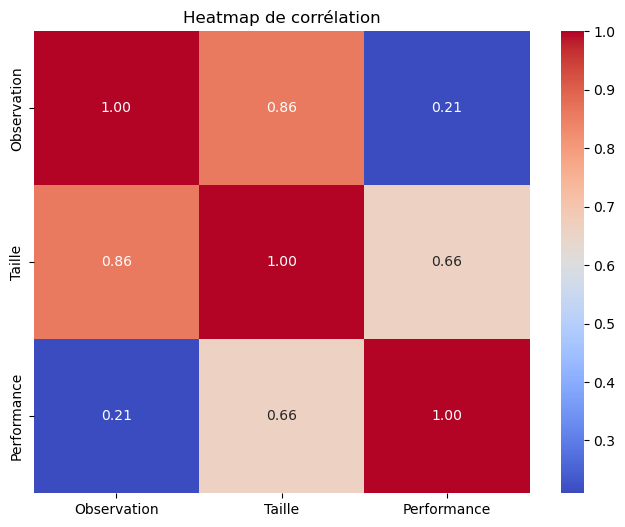

In [15]:
import seaborn as sns
# Supposons que df est votre DataFrame
# Sélection des colonnes numériques uniquement
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcul de la matrice de corrélation
corr_matrix = df_numeric.corr()

# Tracer la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de corrélation')
plt.show()


In [17]:
import pandas as pd

# Supposons que vous avez déjà chargé vos données dans un DataFrame nommé 'data'
# et que ce DataFrame contient les colonnes 'Taille' et 'Performance'

# Calculer la corrélation entre 'Taille' et 'Performance'
correlation = df['Taille'].corr(df['Performance'])
print(f"Coefficient de corrélation de Pearson: {correlation}")

Coefficient de corrélation de Pearson: 0.658859766215344


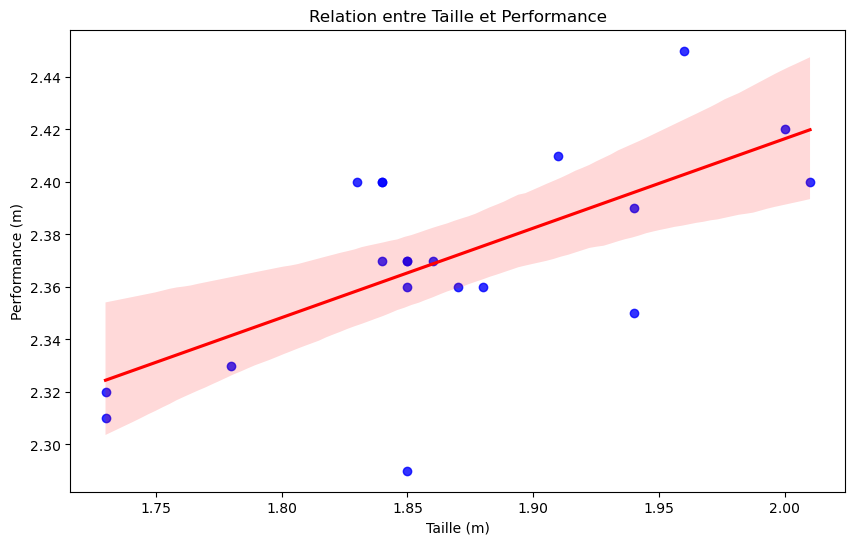

In [73]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Taille', y='Performance', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Relation entre Taille et Performance')
plt.xlabel('Taille (m)')
plt.ylabel('Performance (m)')
plt.show()

In [19]:
import pandas as pd

# Supposons que votre DataFrame s'appelle `data`
# et qu'il contient les colonnes 'Taille' et 'Performance'
X = df[['Taille']]  # Variable indépendante
y = df['Performance']  # Variable dépendante

In [21]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [209]:
print(len(X_train))
print(len(y_test))

16
4


In [23]:
from sklearn.linear_model import LinearRegression

# Créer le modèle de régression linéaire
model = LinearRegression()
# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Coefficients du modèle
intercept = model.intercept_
slope = model.coef_[0]

print(f'Intercept (β0): {intercept}')
print(f'Pente (β1): {slope}')

Intercept (β0): 1.842282608695651
Pente (β1): 0.2841614906832305


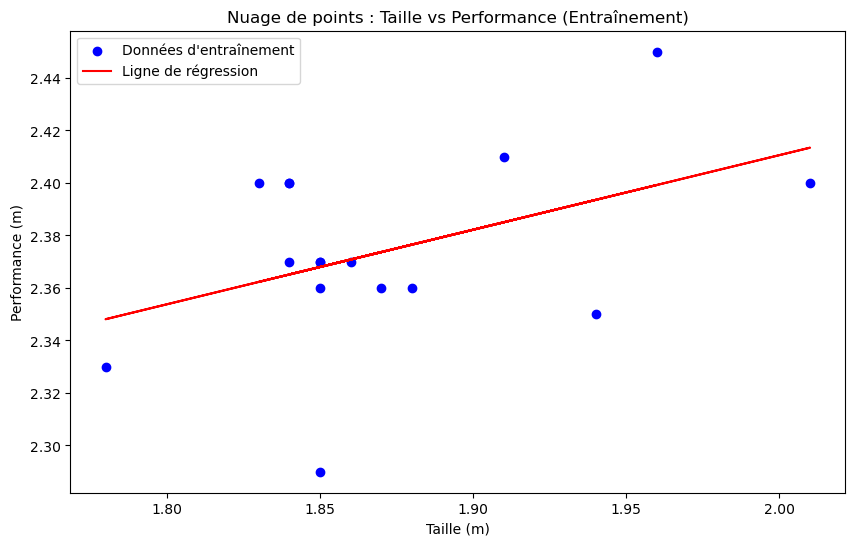

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Données d\'entraînement')
plt.plot(X_train, model.predict(X_train), color='red', label='Ligne de régression')
plt.title('Nuage de points : Taille vs Performance (Entraînement)')
plt.xlabel('Taille (m)')
plt.ylabel('Performance (m)')
plt.legend()
plt.show()

In [29]:
y_pred = model.predict(X_test)

In [31]:
print(y_pred)

[2.33388199 2.41060559 2.3935559  2.33388199]


In [33]:
r2 = model.score(X_test, y_test)
print(f"Coefficient de Détermination (R²): {r2}")

Coefficient de Détermination (R²): 0.8995397352241133


In [45]:

print(f"Intercept (β0): {intercept}")
print(f"Coefficient (β1): {slope}")
print(f"Coefficient de Détermination (R²): {r2}")

if r2 > 0.7:
    print("Le modèle explique bien la variance de la performance.")
elif r2 > 0.4:
    print("Le modèle explique une partie de la variance de la performance.")
else:
    print("Le modèle n'explique pas bien la variance de la performance.")

Intercept (β0): 1.842282608695651
Coefficient (β1): 0.2841614906832305
Coefficient de Détermination (R²): 0.8995397352241133
Le modèle explique bien la variance de la performance.


In [47]:
# Vérifier les longueurs de y_test et y_pred
print(f"y_test length: {len(y_test)}")
print(f"y_pred length: {len(y_pred)}")

y_test length: 4
y_pred length: 4


In [235]:
y_true = y_test
# S'assurer que les longueurs sont les mêmes avant de calculer les métriques
if len(y_true) == len(y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
   
    mae = mean_absolute_error(y_true, y_pred)

    print(f'Erreur Quadratique Moyenne (MSE): {mse}')
    print(f'Coefficient de Détermination (R²): {r2}')
    print(f'Erreur Absolue Moyenne (MAE): {mae}')
    rmse = np.sqrt(mse)
    print(f'Racine Carrée de l\'Erreur Quadratique Moyenne (RMSE): {rmse}')
else:
    print("Les longueurs de y_true et y_pred ne correspondent pas.")

Erreur Quadratique Moyenne (MSE): 0.00021598956926815652
Coefficient de Détermination (R²): 0.8995397352241133
Erreur Absolue Moyenne (MAE): 0.012678571428571317
Racine Carrée de l'Erreur Quadratique Moyenne (RMSE): 0.014696583591711256


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Valeurs Réelles', y='Prédictions', data=comparison_df)
plt.title('Comparaison des Prédictions et des Valeurs Réelles')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ligne diagonale
plt.show()

NameError: name 'comparison_df' is not defined

<Figure size 1000x600 with 0 Axes>

0    -0.013882
17    0.009394
15   -0.003556
1    -0.023882
Name: Performance, dtype: float64


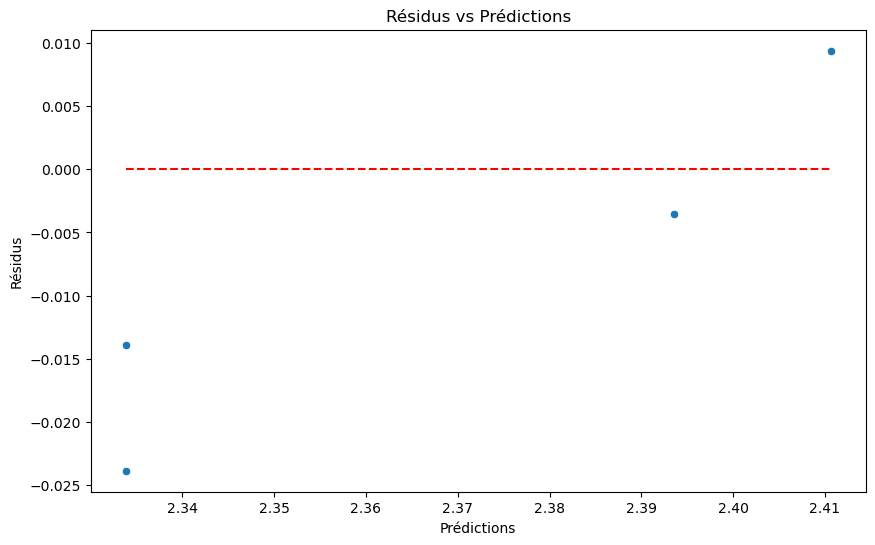

In [241]:
# Calculer les résidus
residus = y_test - y_pred
# Ajouter les résidus au DataFrame de comparaison
comparison_df['Résidus'] = residus

# Tracer les résidus
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Prédictions', y='Résidus', data=comparison_df)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red', linestyle='--')
plt.title('Résidus vs Prédictions')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()


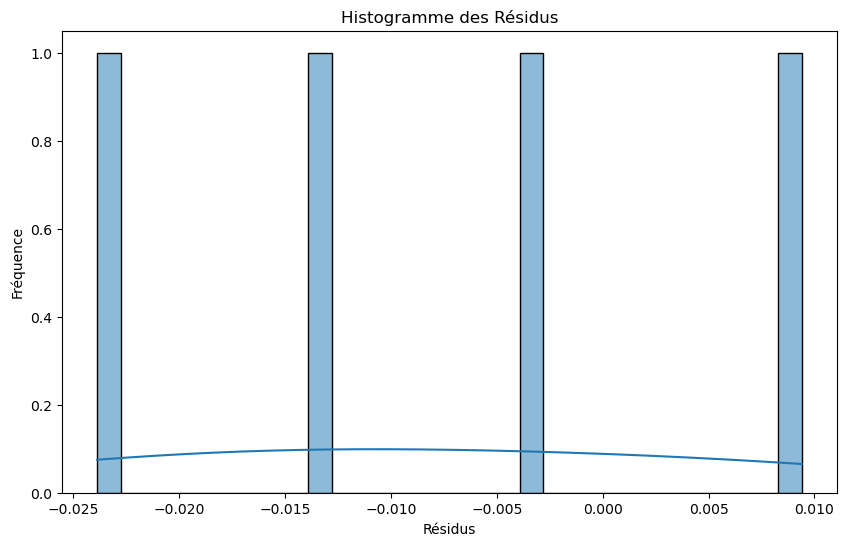

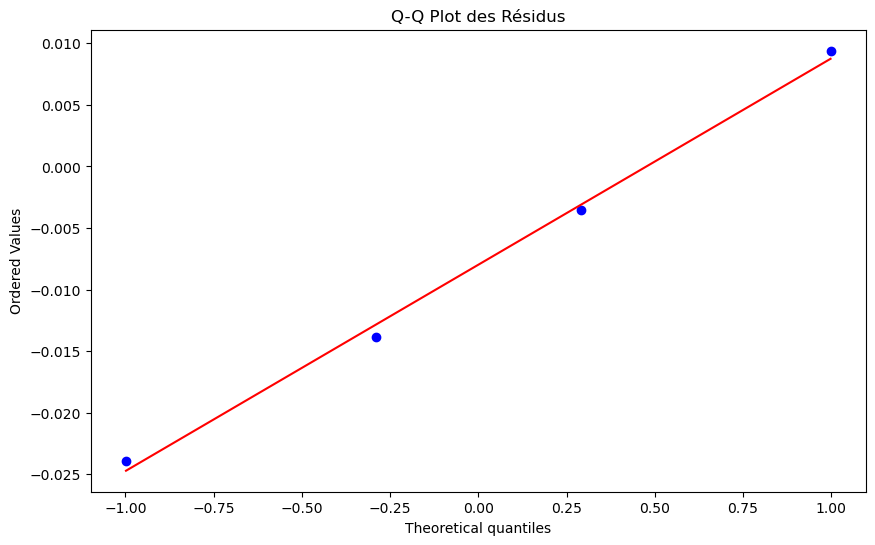

In [97]:
import scipy.stats as stats

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus, kde=True, bins=30)
plt.title('Histogramme des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Q-Q plot des résidus
plt.figure(figsize=(10, 6))
stats.probplot(residus, dist="norm", plot=plt)
plt.title('Q-Q Plot des Résidus')
plt.show()

In [63]:
residus = y_test - y_pred
print(residus)

0    -0.013882
17    0.009394
15   -0.003556
1    -0.023882
Name: Performance, dtype: float64


In [117]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Exemple de création de données pour tester le code
# Remplacer par vos données réelles
data = {
    'Taille': [180, 175, 190, 185, 170, 179, 182, 178],
    'Performance': [75, 65, 90, 85, 60, 70, 80, 68]
}
df = pd.DataFrame(data)

# Variables indépendantes et dépendante
X = df[['Taille']]
y = df['Performance']

# Transformer les données pour inclure les caractéristiques polynomiales
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Diviser les données transformées en jeu d'entraînement et de test
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Appliquer la régression linéaire sur les données transformées
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Prédictions et évaluation
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Erreur Moyenne Quadratique (MSE) - Régression Polynomiale: {mse_poly}')
print(f'Coefficient de Détermination (R²) - Régression Polynomiale: {r2_poly}')

Erreur Moyenne Quadratique (MSE) - Régression Polynomiale: 7.110037607594386
Coefficient de Détermination (R²) - Régression Polynomiale: -0.13760601721510168


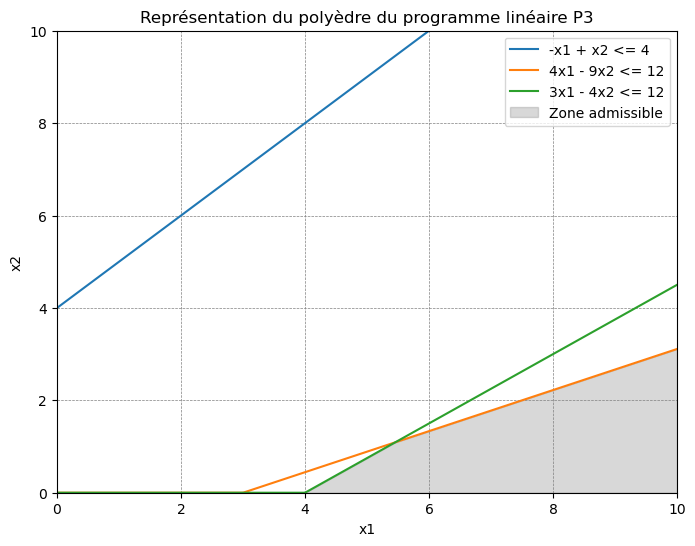

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Définir les contraintes
x1 = np.linspace(0, 10, 400)

# Contraintes sous forme de fonctions de x1
c1 = x1 + 4  # -x1 + x2 <= 4 -> x2 <= x1 + 4
c2 = (4 * x1 - 12) / 9  # 4x1 - 9x2 <= 12 -> x2 >= (4x1 - 12) / 9
c3 = (3 * x1 - 12) / 4  # 3x1 - 4x2 <= 12 -> x2 <= (3x1 - 12) / 4

# Limiter les contraintes pour x1 >= 0
c1 = np.maximum(c1, 0)
c2 = np.maximum(c2, 0)
c3 = np.maximum(c3, 0)

# Créer la figure
plt.figure(figsize=(8, 6))

# Tracer les lignes des contraintes
plt.plot(x1, c1, label="-x1 + x2 <= 4")
plt.plot(x1, c2, label="4x1 - 9x2 <= 12")
plt.plot(x1, c3, label="3x1 - 4x2 <= 12")

# Remplir la zone admissible
plt.fill_between(x1, 0, np.minimum(c1, np.minimum(c2, c3)), color='gray', alpha=0.3, label="Zone admissible")

# Configurer le graphique
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Représentation du polyèdre du programme linéaire P3")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

# Afficher le graphique
plt.show()


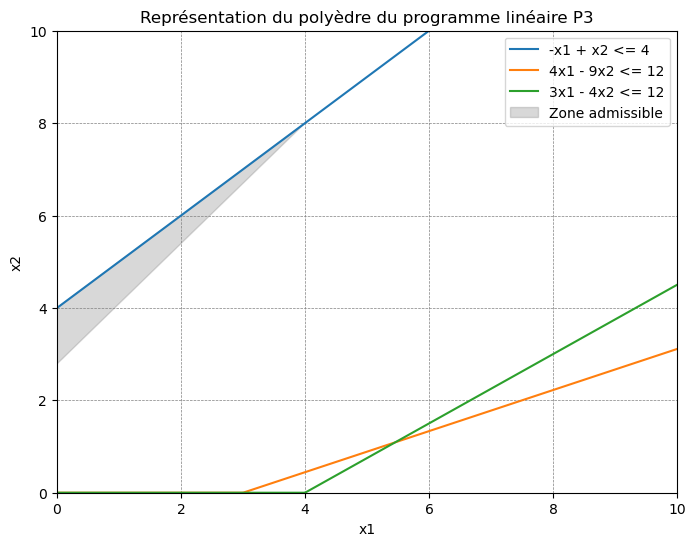

Point 1: (x1, x2) = (0.00, 4.00)
Point 2: (x1, x2) = (3.69, 7.69)
Point 3: (x1, x2) = (4.00, 8.00)
Point 4: (x1, x2) = (-4.80, -3.47)
Point 5: (x1, x2) = (0.00, 0.00)


In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Définir les contraintes
x1 = np.linspace(0, 10, 400)

# Contraintes sous forme de fonctions de x1
c1 = x1 + 4  # -x1 + x2 <= 4 -> x2 <= x1 + 4
c2 = (4 * x1 - 12) / 9  # 4x1 - 9x2 <= 12 -> x2 <= (4x1 - 12) / 9
c3 = (3 * x1 - 12) / 4  # 3x1 - 4x2 <= 12 -> x2 <= (3x1 - 12) / 4

# Limiter les contraintes pour x1 >= 0
c1 = np.maximum(c1, 0)
c2 = np.maximum(c2, 0)
c3 = np.maximum(c3, 0)

# Calcul des intersections des contraintes pour délimiter la zone admissible
# Intersection entre c1 et c2
x1_inter_c1_c2 = (12 + 9 * 4) / (4 + 9)  # Résolution de x1 + 4 = (4x1 - 12) / 9
x2_inter_c1_c2 = x1_inter_c1_c2 + 4

# Intersection entre c1 et c3
x1_inter_c1_c3 = (12 + 4 * 4) / (3 + 4)  # Résolution de x1 + 4 = (3x1 - 12) / 4
x2_inter_c1_c3 = x1_inter_c1_c3 + 4

# Intersection entre c2 et c3
x1_inter_c2_c3 = (12 - (-12)) / (4 - 9)  # Résolution de (4x1 - 12) / 9 = (3x1 - 12) / 4
x2_inter_c2_c3 = (4 * x1_inter_c2_c3 - 12) / 9

# Points d'intersection
intersections = [
    (0, c1[0]),  # Intersection avec l'axe x2
    (x1_inter_c1_c2, x2_inter_c1_c2),
    (x1_inter_c1_c3, x2_inter_c1_c3),
    (x1_inter_c2_c3, x2_inter_c2_c3),
    (0, 0)  # Origine
]

# Créer la figure
plt.figure(figsize=(8, 6))

# Tracer les lignes des contraintes
plt.plot(x1, c1, label="-x1 + x2 <= 4")
plt.plot(x1, c2, label="4x1 - 9x2 <= 12")
plt.plot(x1, c3, label="3x1 - 4x2 <= 12")

# Tracer la zone admissible
polygon = np.array(intersections)
plt.fill(polygon[:, 0], polygon[:, 1], color='gray', alpha=0.3, label="Zone admissible")

# Configurer le graphique
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Représentation du polyèdre du programme linéaire P3")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()

# Afficher le graphique
plt.show()

# Affichage des points d'intersection
for i, (x, y) in enumerate(intersections):
    print(f"Point {i + 1}: (x1, x2) = ({x:.2f}, {y:.2f})")


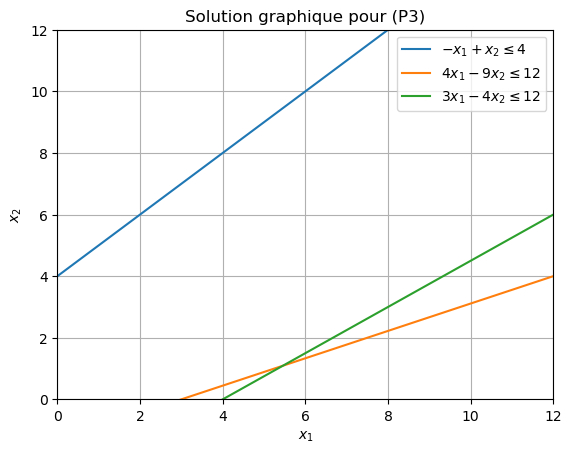

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Définir les fonctions de contraintes
def constraint1(x1):
    return 4 + x1

def constraint2(x1):
    return (4 * x1 - 12) / 9

def constraint3(x1):
    return (3 * x1 - 12) / 4

# Tracer les lignes de contraintes
x1 = np.linspace(0, 12, 400)
plt.plot(x1, constraint1(x1), label=r'$-x_1 + x_2 \leq 4$')
plt.plot(x1, constraint2(x1), label=r'$4x_1 - 9x_2 \leq 12$')
plt.plot(x1, constraint3(x1), label=r'$3x_1 - 4x_2 \leq 12$')

# Tracer les axes
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Remplir la région faisable
plt.fill_between(x1, np.minimum(np.minimum(constraint1(x1), constraint2(x1)), constraint3(x1)), 0, where=(x1<=3), color='gray', alpha=0.3)

plt.xlim((0, 12))
plt.ylim((0, 12))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.grid(True)
plt.title('Solution graphique pour (P3)')
plt.show()

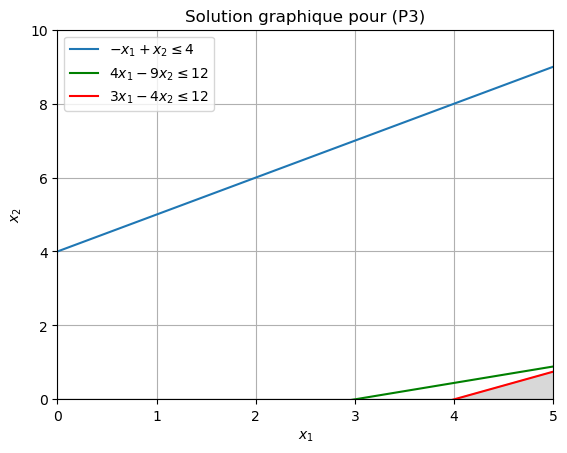

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Définir les fonctions de contraintes
def constraint1(x1):
    return 4 + x1

def constraint2(x1):
    return (4 * x1 - 12) / 9

def constraint3(x1):
    return (3 * x1 - 12) / 4

# Tracer les lignes de contraintes
x1 = np.linspace(0, 12, 400)
plt.plot(x1, constraint1(x1), label=r'$-x_1 + x_2 \leq 4$')
plt.plot(x1, constraint2(x1), label=r'$4x_1 - 9x_2 \leq 12$', color='green')
plt.plot(x1, constraint3(x1), label=r'$3x_1 - 4x_2 \leq 12$', color='red')

# Tracer les axes
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Remplir la région faisable
plt.fill_between(x1, 0, np.minimum(np.minimum(constraint1(x1), constraint2(x1)), constraint3(x1)), where=(x1 >= 0), color='gray', alpha=0.3)

plt.xlim((0, 5))
plt.ylim((0, 10))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.grid(True)
plt.title('Solution graphique pour (P3)')
plt.show()

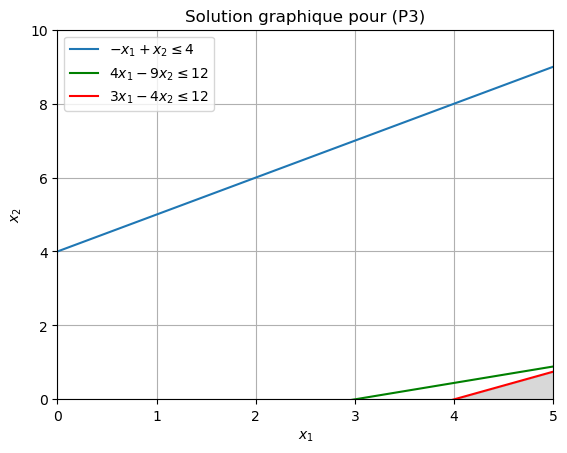

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Définir les fonctions de contraintes
def constraint1(x1):
    return 4 + x1

def constraint2(x1):
    return (4 * x1 - 12) / 9

def constraint3(x1):
    return (3 * x1 - 12) / 4

# Tracer les lignes de contraintes
x1 = np.linspace(0, 5, 400)
plt.plot(x1, constraint1(x1), label=r'$-x_1 + x_2 \leq 4$')
plt.plot(x1, constraint2(x1), label=r'$4x_1 - 9x_2 \leq 12$', color='green')
plt.plot(x1, constraint3(x1), label=r'$3x_1 - 4x_2 \leq 12$', color='red')

# Tracer les axes
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Remplir la région faisable
plt.fill_between(x1, 0, np.minimum(np.minimum(constraint1(x1), constraint2(x1)), constraint3(x1)), where=(x1 >= 0), color='gray', alpha=0.3)

plt.xlim((0, 5))
plt.ylim((0, 10))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.grid(True)
plt.title('Solution graphique pour (P3)')
plt.show()